## `Capital Asset Pricing Model (CAPM):`

The primary goal of CAPM is to help investors and financial analysts make informed decisions about the risk and return characteristics of investments within their portfolios. The goal is achieved by understanding the relationship between the expected return of an asset and its systematic risk, as measured by beta (β).

CAPM takes into account three factors
- Risk free rate
- Beta of the investment
- Market risk premium

Ra = Rrf + [βa * (Rm – Rrf)]

where,\
Ra; expected return on the capital asset.\
Rrf; risk free rate of the capital interest.\
βa; sensitivity to the expected excess market return to the expected excess market return.\
(Rm – Rrf) = Market Risk Premium; Additional return expected for holding the risky market portfolio instead of the risk free asset.

In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Define the ticker symbol of your stock
stock_symbol = 'AAPL'

# Define start and end dates for fetching data
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2023, 12, 31)


In [3]:
# Fetch stock data (adjusted close prices)
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Fetch risk-free rate (10-year Treasury constant maturity rate)
risk_free_data = yf.download('^TNX', start_date, end_date)['Adj Close'] / 100

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Fetch market data (e.g., S&P 500 index)
market_data = yf.download('^GSPC', start_date, end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


Here, we use the yfinance library to fetch adjusted closing prices ('Adj Close') of a specific stock,10 year treasury notes that are close to risk free, and a market index (^GSPC, S&P 500) over a specified time period (start_date to end_date).

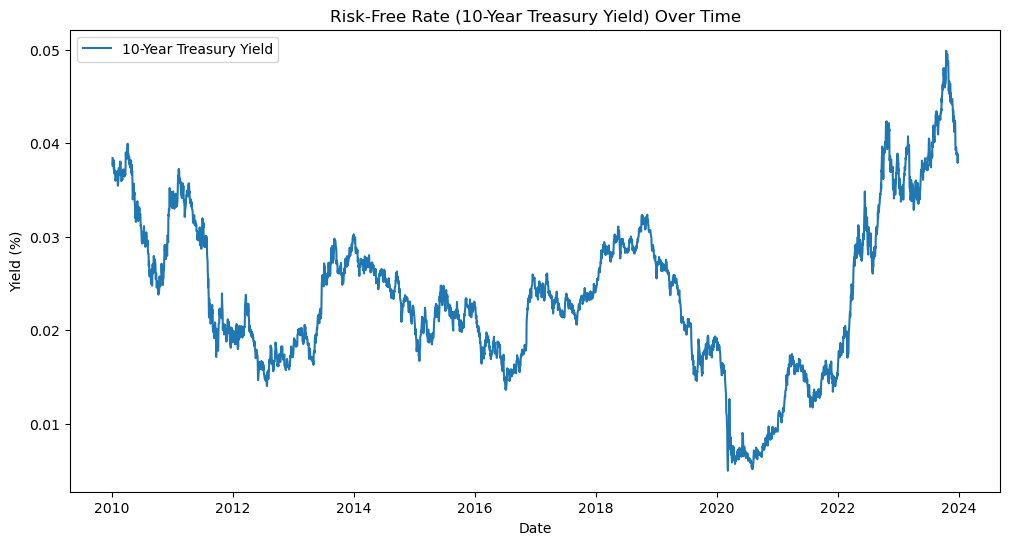

In [6]:
# Plot risk-free rate over time
plt.figure(figsize=(12, 6))
plt.plot(risk_free_data, label='10-Year Treasury Yield')
plt.title('Risk-Free Rate (10-Year Treasury Yield) Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

#### Result
The graph shows the % return an investor can earn in each year if he holds the 10 year treasury yield notes until maturity. They are risk free asset since the government backs them however the yield is quite lower compare to the other investments.

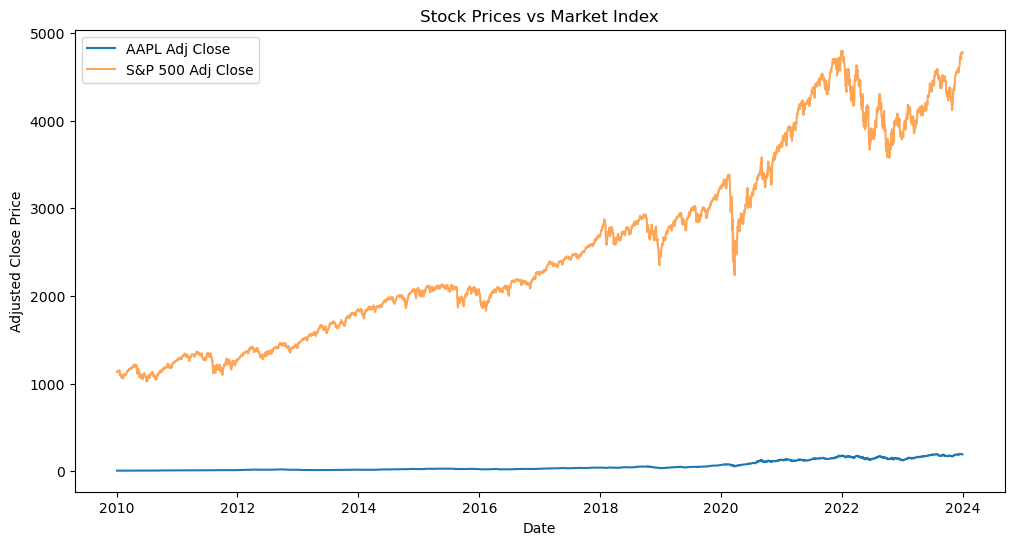

In [7]:
# Plot stock prices and market index
plt.figure(figsize=(12, 6))
plt.plot(stock_data, label=f'{stock_symbol} Adj Close')
plt.plot(market_data, label='S&P 500 Adj Close', alpha=0.7)
plt.title('Stock Prices vs Market Index')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

#### Result
Above graph shows that the trend line of the sp500 and Apple stocks is quite similar in a way that they are both increasing over time.

In [8]:
# Calculate excess returns for the stock and the market
stock_returns = np.log(stock_data / stock_data.shift(1))
stock_returns.dropna(inplace=True)

market_returns = np.log(market_data / market_data.shift(1))
market_returns.dropna(inplace=True)

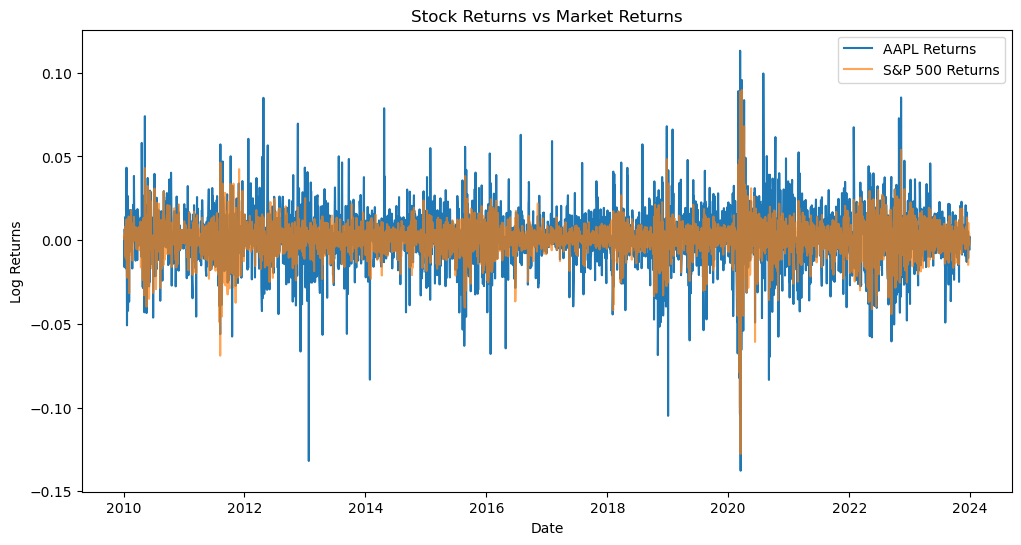

In [9]:
# Plot stock returns and market returns
plt.figure(figsize=(12, 6))
plt.plot(stock_returns, label=f'{stock_symbol} Returns')
plt.plot(market_returns, label='S&P 500 Returns', alpha=0.7)
plt.title('Stock Returns vs Market Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

#### Result
Above graph compare the daily returns of the market and the stock. The stock line has more volatality therefore it is more riskier than the market.

In [10]:
# Calculate expected return using CAPM
risk_free_rate = risk_free_data.mean()
market_return = market_returns.mean()

In [11]:
# excessive return on the stock
extra_return = market_return - risk_free_rate
extra_return

-0.02329088286313155

#### Result
The above return shows the extra return that we could earn while opting the risky investment instead of the risk free investment.

### CAPM 

- `Beta (β):` Beta measures the sensitivity of a stock's returns to changes in the market returns. It quantifies the risk of the stock relative to the overall market.
- `Calculation:` Beta is calculated using the covariance between the stock's returns and the market returns, divided by the variance of the market returns.`

- `Expected Return (𝐸(𝑅)):` In CAPM, the expected return of a stock is determined by the risk-free rate, the stock's beta, and the expected return of the market.
- `Calculation:` The expected return is calculated as the risk-free rate plus the product of beta and the market risk premium (the difference between the expected market return and the risk-free rate).

In [12]:
def calculate_expected_return(beta, risk_free_rate, market_return):
    return risk_free_rate + beta * (market_return - risk_free_rate)

def calculate_beta(stock_returns, market_returns):
    covariance = np.cov(stock_returns, market_returns)
    beta = covariance[0, 1] / np.var(market_returns)
    return beta

In [13]:
# Calculate beta using linear regression (stock vs market)
beta = calculate_beta(stock_returns, market_returns)
beta

1.1106934578960206

In [14]:
expected_return = calculate_expected_return(beta, risk_free_rate, market_return)
expected_return

-0.0021698977129006834

In [15]:
print(f"Beta for {stock_symbol}: {beta:.2f}")
print(f"Expected Return for {stock_symbol}: {expected_return:.2%}")

Beta for AAPL: 1.11
Expected Return for AAPL: -0.22%


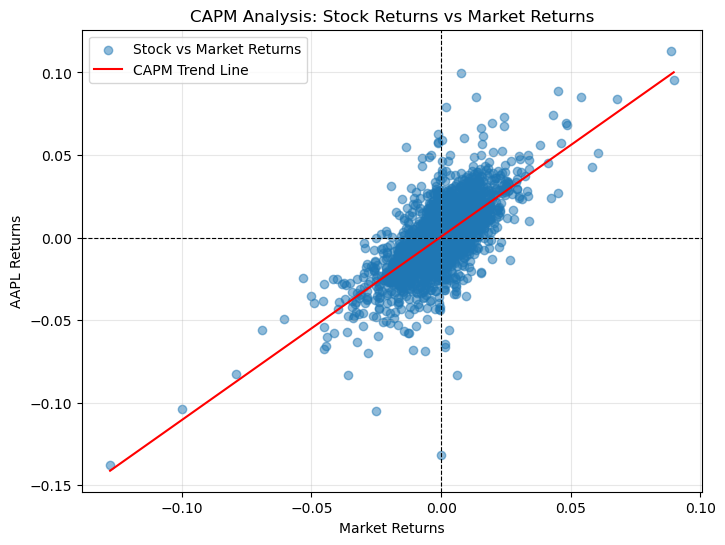

Beta for AAPL: 1.11
Expected Return for AAPL: -0.22%


In [16]:
# Plot CAPM analysis with trend line
plt.figure(figsize=(8, 6))
plt.scatter(market_returns, stock_returns, alpha=0.5, label='Stock vs Market Returns')
plt.xlabel('Market Returns')
plt.ylabel(f'{stock_symbol} Returns')
plt.title('CAPM Analysis: Stock Returns vs Market Returns')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(True, alpha=0.3)

# Calculate the linear regression line (trend line)
slope, intercept, r_value, p_value, std_err = linregress(market_returns, stock_returns)
x_vals = np.linspace(min(market_returns), max(market_returns), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='CAPM Trend Line')

plt.legend()
plt.show()

# Display calculated beta and expected return
print(f"Beta for {stock_symbol}: {beta:.2f}")
print(f"Expected Return for {stock_symbol}: {expected_return:.2%}")

#### Result

Beta (β): 1.11 The calculated beta (β) of 1.11 indicates that AAPL's returns are expected to be approximately 1.11 times as volatile as the overall market returns (represented by a benchmark such as the S&P 500 index).

Expected Return (E(R)): -0.22% The calculated expected return (E(R)) of -0.22% represents the anticipated rate of return for AAPL based on its risk (as measured by beta) and the prevailing market conditions, including the risk-free rate and expected market return.

#### Conclusion

- With a beta greater than 1 (1.11), AAPL is considered to have above-average systematic risk compared to the overall market. This implies that AAPL's stock price tends to be more volatile than the market as a whole, meaning it can experience larger price fluctuations in response to market movements.

- The negative expected return (-0.22%) suggests that, based on the CAPM model, AAPL's returns are expected to be slightly lower than the risk-free rate adjusted for market risk. This could imply that investors may not be adequately compensated for the level of risk associated with investing in AAPL at the current market price.
